<a href="https://colab.research.google.com/github/maleal2/maleal2-Assignment-2.1-CNN-and-Pre-Trained-Models/blob/main/MariaLeal_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Name**: Maria Carolina Leal Cardenas.
- **Date**: 11/03/2024.

# PART I CNN

- For the first part of the assignment, we want to work pn a black and white image which is an OCR ( Optical Character Recogntion ). Optical character recognition or optical character reader is the electronic or mechanical conversion of images of typed, handwritten, or printed text into machine-encoded text, whether from a scanned document, a photo of a document, a scene-photo or from subtitle text superimposed on an image.

- 1.a) Start with creating a visualization of your input data.

**Importing necessary libraries for the first part of the assignment**

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

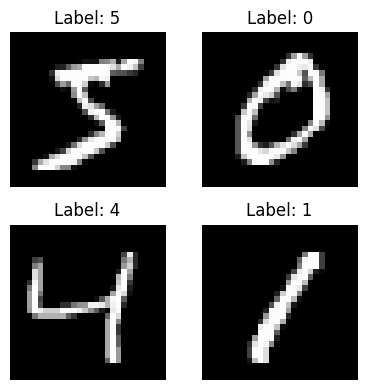

In [ ]:
# Loading MNIST dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plotting the first few images
plt.figure(figsize=(4, 4))
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.tight_layout()


**Pre-processing of the model**

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical

# Image dimensions
img_rows, img_cols = 28, 28

# Reshaping based on image data format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalizing inputs from 0-255 to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Encoding outputs
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
# Checking the shapes
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Checing the data range
print("Min and Max values in X_train:", x_train.min(), x_train.max())
print("Min and Max values in X_test:", x_test.min(), x_test.max())

# Checking a sample label to confirm one-hot encoding
print("Example of one-hot encoded label y_train[0]:", y_train[0])


Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of y_test: (10000, 10)
Min and Max values in X_train: 0.0 1.0
Min and Max values in X_test: 0.0 1.0
Example of one-hot encoded label y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


1.b) Create a CNN model with 4 convolutional layers in which two of them have 32 and two of them have 64 filters. The fully connected layers has one hidden layer (512 nodes). Draw the learning curve. What is your understanding of the learning curve? Batch size = 128 and epochs = 20.

**Importing necessary libraries for the second part of the assigment**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Define the CNN model with padding to prevent excessive shrinking
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Notes**:

- Padding was added to keep the spatial dimensions consistent after each convolutional layer, which prevents the input from shrinking too quickly.

- (3,3) : specifies the kernel or filter size for the convolution operation, meaning that each filter in this layer will cover a 3x3 area of the input image.
During convolution , this 3x3 filter slides over the entire input image ( or feature map), multiplying the values in the filter by corresponding values in the image, and summing them to produce a single output value. This operation is repeated across the image, generating a new features map that highlights specific patterns like edges or textures.

- (2,2): specifies the window size of the pooling operation, which reduces the spatial dimensions ( width and height ) of the feature maps. Max pooling takes the maximum value within each 2x2 region of the feture map and discards the rest. This helps reduce the dimensionality, making the network more efficient while retaining the most important features. By reducing the feature map size, max pooling helps prevent overfitting, reduces computationa, and allows the network to become more invariant to small translations in the input ( i.e., small shifts in the image will not affect the outcome as much).

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,546 (1.39 MB)

 Trainable params: 365,546 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 150ms/step - accuracy: 0.8486 - loss: 0.5057 - val_accuracy: 0.9829 - val_loss: 0.0521
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 146ms/step - accuracy: 0.9822 - loss: 0.0550 - val_accuracy: 0.9854 - val_loss: 0.0398
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 145ms/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.9888 - val_loss: 0.0310
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 147ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9901 - val_loss: 0.0306
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9917 - val_loss: 0.0279
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 171ms/step - accuracy: 0.9951 - loss: 0.0159 - val_accuracy: 0.9895 - val_loss: 0.0332
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 167ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9888 - val_loss: 0.0333
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 161ms/step - accuracy: 0.9956 - loss: 0

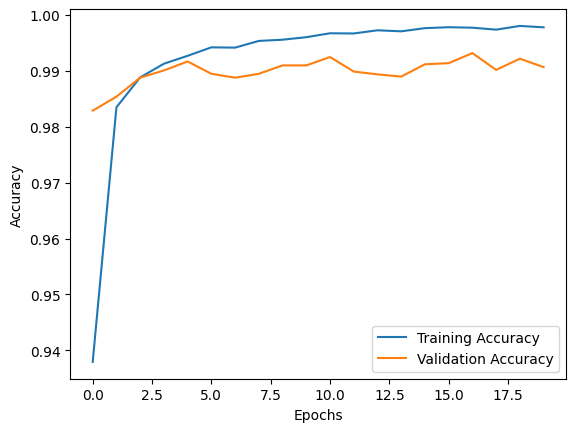

In [ ]:
# Training the model and plotting the learning curve.
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Plotting the learning curve.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- Both training and validation accuracy are very high, indicating that the model is performing well on both  the training and validation sets. This suggests that the model has learned the patterns in the data effectively.

- The training accuracy is slightly higher than the validation accuracy, especially after the first few epochs. This indicates a minor overfitting, where the model pattern performs slightly better on training data compared to validation data. The gap between training and validation accuracy is amall, so this overfitting is not severe. The model is still generalizing quite well on the validation set.  

- After 5 to 7 epochs, both training and validation accuracy are near 99 to 100%.This indicates that the model has likely reached its maximum capacity for learning from this data, and further trainiing won't yield significant improvements.

# PART II CIFAR-10

- For the next part we work on a CIFAR-10 Dataset. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. You can get more information about the dataset here: https://www.cs.toronto.edu/~kriz/cifar.html. The difference this time is that this is a colorful dataset.

- 2.a) As before, start with visualizing your data to get some insights. Plot the first 9 images from the dataset.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


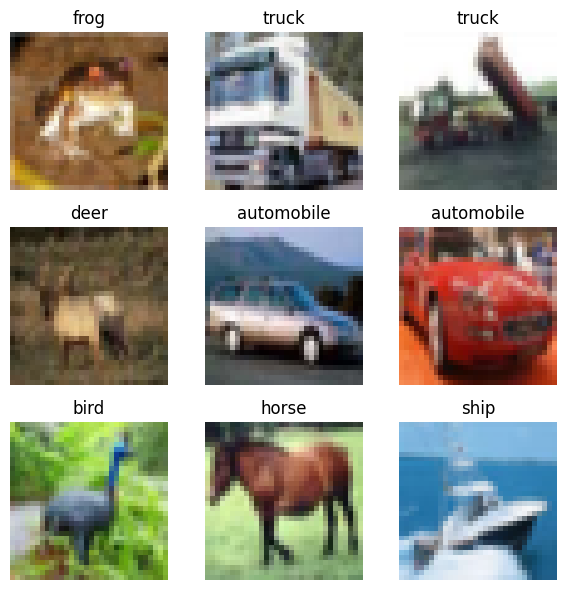

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Loading CIFAR-10 dataset.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Defining class labels for CIFAR-10.
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Plot the first 9 images with their labels.
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

2.b) Apply the preprocessing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20%, and horizontally flipped.

Now, design a CNN model with 4 convolutional layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively).

Draw the learning curve. What is your understanding of the learning curve? Batch size= 128 and epochs = 20. Apply the model on the processed data.

For optimizer, use Stochastic gradient descent with a learning rate of 0.005, decay of 1x10-6, momentum of 0.09.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
it_train = datagen.flow(x_train, y_train, batch_size=128)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define the model without dropout
model_no_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Define learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=10000,
    decay_rate=0.9
)

# Compile the model
opt = SGD(learning_rate=lr_schedule, momentum=0.9)
model_no_dropout.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_no_dropout.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 724,266 (2.76 MB)

 Trainable params: 724,266 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history_no_dropout = model_no_dropout.fit(it_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 291ms/step - accuracy: 0.1940 - loss: 2.1803 - val_accuracy: 0.3730 - val_loss: 1.7394
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 292ms/step - accuracy: 0.3887 - loss: 1.6928 - val_accuracy: 0.4778 - val_loss: 1.4379
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 291ms/step - accuracy: 0.4629 - loss: 1.4870 - val_accuracy: 0.5289 - val_loss: 1.3125
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 109s 278ms/step - accuracy: 0.5169 - loss: 1.3575 - val_accuracy: 0.5387 - val_loss: 1.3036
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 275ms/step - accuracy: 0.5444 - loss: 1.2772 - val_accuracy: 0.5680 - val_loss: 1.2050
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 289ms/step - accuracy: 0.5868 - loss: 1.1731 - val_accuracy: 0.6196 - val_loss: 1.0855
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 113s 289ms/step - accuracy: 0.6090 - loss: 1.1071 - val_accuracy: 0.6284 - val_loss: 1.0453
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 113s 289ms/step - accuracy: 0.6236 -

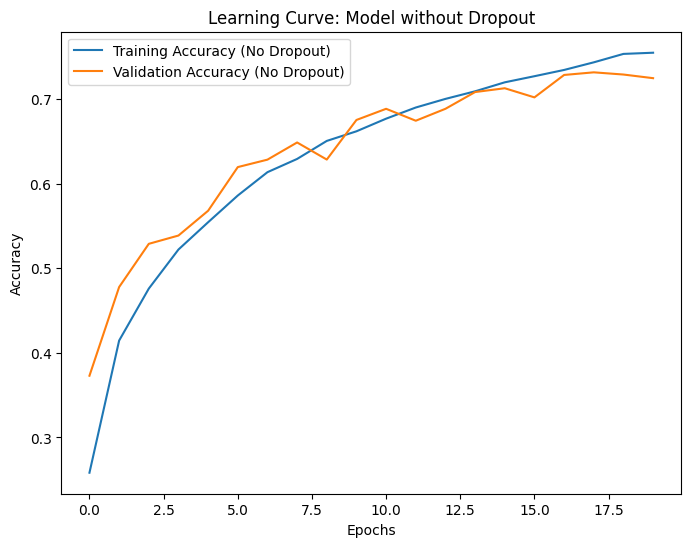

In [ ]:
import matplotlib.pyplot as plt

# Plotting learning curves for the model without dropout
plt.figure(figsize=(8, 6))
plt.plot(history_no_dropout.history['accuracy'], label='Training Accuracy (No Dropout)')
plt.plot(history_no_dropout.history['val_accuracy'], label='Validation Accuracy (No Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Model without Dropout')
plt.legend()
plt.show()


**Observations**:

- The training and validation accuracy curves are slightly close to each other, which is good sign that the model is not drastically overfitting.
- However, as training progresses, we can see that the training accuracy starts to pull ahead slightly, while the validation accuracy begins to stabilize around 70 to 75% . This might indicate the start of overfitting as the model tries to memorize the training data.
- The validation accuracy does not keep increasing in tandem with the training accuracy, which is a subtle indication that the model is learning specific features from the training set that don't generalize as well to the validation set.

2.c) Recommend a technique to resolve the issue that you saw on 2.b and implement your recommendation.

Next, I am going to train and visualize the learning curve for the model with dropout layers. Adding dropout layers should help to mitigate overfitting, and we should ideally see a closer amtch between training and validation accuracy.

In [ ]:
# Defining a new learning rate schedule for the model with dropout
lr_schedule_with_dropout = ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=10000,
    decay_rate=0.9
)

# Creating a new SGD optimizer instance for the model with dropout
opt_with_dropout = SGD(learning_rate=lr_schedule_with_dropout, momentum=0.9)


In [ ]:
from tensorflow.keras.layers import Dropout

# Defining the model with dropout
model_with_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model with dropout using the new optimizer
model_with_dropout.compile(optimizer=opt_with_dropout, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with dropout
history_with_dropout = model_with_dropout.fit(it_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 316ms/step - accuracy: 0.1171 - loss: 2.2937 - val_accuracy: 0.2309 - val_loss: 2.1062
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 318ms/step - accuracy: 0.2189 - loss: 2.0744 - val_accuracy: 0.2878 - val_loss: 1.9359
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 312ms/step - accuracy: 0.2687 - loss: 1.9280 - val_accuracy: 0.3535 - val_loss: 1.7744
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 120s 306ms/step - accuracy: 0.3150 - loss: 1.8195 - val_accuracy: 0.3790 - val_loss: 1.6893
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - accuracy: 0.3633 - loss: 1.7254 - val_accuracy: 0.4213 - val_loss: 1.5718
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 293ms/step - accuracy: 0.3905 - loss: 1.6423 - val_accuracy: 0.4605 - val_loss: 1.4737
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 296ms/step - accuracy: 0.4148 - loss: 1.5945 - val_accuracy: 0.4443 - val_loss: 1.5099
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 303ms/step - accuracy: 0.4352 -

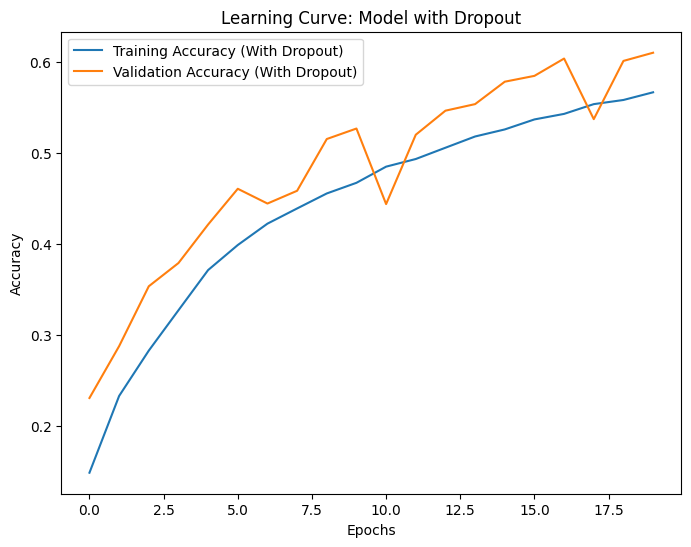

In [ ]:
# Plot learning curves for the model with dropout
plt.figure(figsize=(8, 6))
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy (With Dropout)')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Model with Dropout')
plt.legend()
plt.show()


**Observations for the Model with Dropout layers:**

- The training accuracy is lower than in the model without dropout, which is expected since dropout layers introduce randomness and make it harder for the model to memorize the training data.
- The validation accuracy curve is smoother  and closer to the training curve, suggesting that dropout has successfully reduced overfitting.

- While the validation accuracy fluctuates a bit, it generally tracks closely with the training accuracy, which indicates better generalization. This means that the model is not just learning to memorize the training set but is instead learning patterns that are generalizable to unseen data.

- With dropout, the model seems to be more balanced between training and validation accuracy, indicating that it's likely to perform bettern on unseen data.
- While the peak accuracy may be slightly lower than the model without dropout, the added stability in validation accuracy suggests that this model will likely have better real-world performance.

2.d) Apply at least two pre-trained models on your data and draw the learning curve. What is the test accuracy? How you compare the models?

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Loading VGG16 without the top layers and add new classification layers for CIFAR-10
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model_vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Loading ResNet50 without the top layers and add new classification layers for CIFAR-10
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model_resnet50 = Sequential([
    resnet50_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Defining a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)

# Compiling VGG16 model
model_vgg16.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),
                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compiling ResNet50 model
model_resnet50.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),
                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Training the VGG16 model
history_vgg16 = model_vgg16.fit(it_train, epochs=20, validation_data=(x_test, y_test))

# Training the ResNet50 model
history_resnet50 = model_resnet50.fit(it_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 97ms/step - accuracy: 0.4658 - loss: 1.4969 - val_accuracy: 0.7305 - val_loss: 0.7692
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7393 - loss: 0.7569 - val_accuracy: 0.7682 - val_loss: 0.6694
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.7807 - loss: 0.6342 - val_accuracy: 0.8045 - val_loss: 0.5633
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8072 - loss: 0.5522 - val_accuracy: 0.8231 - val_loss: 0.5085
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8268 - loss: 0.4933 - val_accuracy: 0.8066 - val_loss: 0.5493
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.8396 - loss: 0.4630 - val_accuracy: 0.8269 - val_loss: 0.5085
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8506 - loss: 0.4223 - val_accuracy: 0.8309 - val_loss: 0.4910
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8609 - loss: 0.3885 - val_accurac

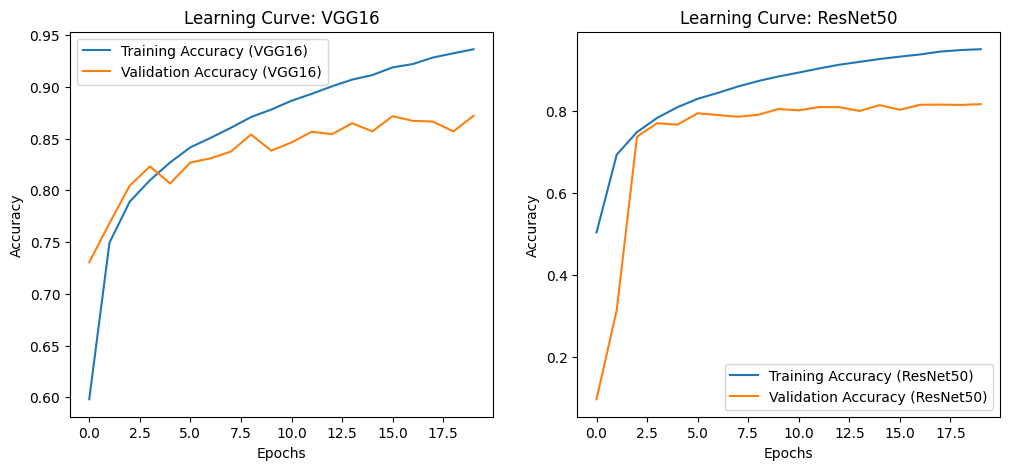

In [ ]:
import matplotlib.pyplot as plt

# Plotting learning curves for VGG16
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='Training Accuracy (VGG16)')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve: VGG16')
plt.legend()

# Plotting learning curves for ResNet50
plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['accuracy'], label='Training Accuracy (ResNet50)')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy (ResNet50)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve: ResNet50')
plt.legend()
plt.show()


In [ ]:
# Evaluating VGG16 model
test_loss_vgg16, test_acc_vgg16 = model_vgg16.evaluate(x_test, y_test)
print(f"VGG16 Test Accuracy: {test_acc_vgg16:.4f}")

# Evaluating ResNet50 model
test_loss_resnet50, test_acc_resnet50 = model_resnet50.evaluate(x_test, y_test)
print(f"ResNet50 Test Accuracy: {test_acc_resnet50:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8733 - loss: 0.4266
VGG16 Test Accuracy: 0.8719
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8110 - loss: 0.6858
ResNet50 Test Accuracy: 0.8156


**Analysis and Observations**:

- **VGG16 Test Accuracy**: 87.19%
- **ResNet50 Test Accuracy**: 81.56%

The VGG16 model has a higher test accuracy compared to the ResNet50 model, indicating that VGG16 generalized better on the CIFAR-10 dataset.


**Learning Curves**

**VGG16**:

The training and validation accuracy for VGG16 both increase steadily, with training accuracy eventually exceeding validation accuracy.

There is a slight gap between training and validation accuracy, suggesting minor overfitting, but overall, VGG16 shows consistent performance.

Validation accuracy stabilizes around 85-87%, which aligns with its test accuracy of 87.19%.

**ResNet50**:

The ResNet50 model shows a higher initial validation accuracy but quickly reaches a plateau, with validation accuracy remaining below 82%.

The training accuracy continues to increase but is higher than the validation accuracy, indicating overfitting.

The plateau in validation accuracy around 80% suggests that ResNet50 struggled more to generalize on the CIFAR-10 dataset compared to VGG16.

**Summary**

VGG16 Outperforms ResNet50 on this dataset in terms of test accuracy and generalization. The smaller gap between VGG16's training and validation accuracy indicates better control over overfitting, resulting in higher test accuracy.

ResNet50 appears to have a more pronounced overfitting issue, as its validation accuracy does not improve after a few epochs despite further increases in training accuracy. This suggests that the model is likely learning specific patterns in the training data that do not generalize well to new data.
